In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# import seaborn as sb

In [3]:
# sb.set()

In [4]:
data_ori = pd.read_csv("watermelon_3.0_alpha.csv")

In [5]:
from sklearn.ensemble import AdaBoostClassifier

In [6]:
from sklearn.tree import DecisionTreeClassifier

In [7]:
from sklearn import tree

In [8]:
def train_ada_boost(data, base_learner_nums):
    base_learner = DecisionTreeClassifier(max_depth=1)
    ada_boost = AdaBoostClassifier(base_learner, n_estimators=base_learner_nums)
    ada_boost.fit(data.iloc[:, :-1], data.iloc[:, -1])
    return ada_boost

In [9]:
def print_error_weight(ada_boost):
    print("Base Learner error and weight:")
    for idx, err, weight in zip(range(1,11), ada_boost.estmator_errors_, ada_boost.estimator_weights_):
        print("Base Learner-%d\t" % idx, err, '\t', weight)

In [10]:
def plot_boundary(dataset,ada_boost, plot_num, num_base):
    fig = plt.subplot(plot_num)
    test_density = np.array(dataset['密度'])
    test_sugar_ratio = np.array(dataset['含糖率'])
    x_step = (max(test_density) - min(test_density))/20
    y_step = (max(test_sugar_ratio) - min(test_sugar_ratio))/20
    test_x = np.arange(min(test_density)-5*x_step, max(test_density)+5*x_step, x_step)
    test_y = np.arange(min(test_sugar_ratio)-5*y_step, max(test_sugar_ratio)+5*y_step, y_step)
    test_data = np.transpose([np.tile(test_x, len(test_y)), np.repeat(test_y, len(test_x))])
    test_out = ada_boost.predict(test_data)
    for i in range(len(test_out)):
        if test_out[i]:
            plt.plot(test_data[i,0], test_data[i,1], 'bx', alpha=0.5)
        else:
            plt.plot(test_data[i,0], test_data[i,1], 'gx', alpha=0.5)
    dataset0 = dataset[dataset['好瓜']==0]
    dataset1 = dataset[dataset['好瓜']==1]
    plt.plot(list(dataset0['密度']), list(dataset0['含糖率']), 'g.')
    plt.plot(list(dataset1['密度']), list(dataset1['含糖率']), 'b.')
    plt.title('num_classifier='+str(num_base))
    plt.show()

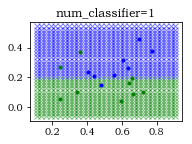

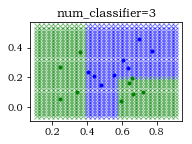

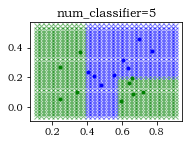

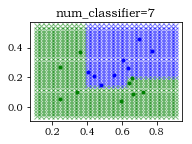

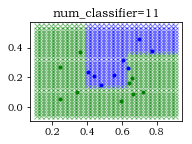

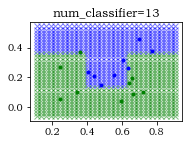

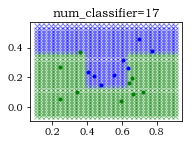

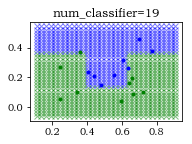

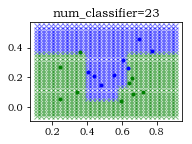

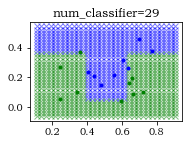

In [11]:
for i in [1,3,5,7,11,13,17,19,23,29]:
    ada = train_ada_boost(data_ori, base_learner_nums=i)
    plot_boundary(data_ori, ada, 221, i)